# Topic Modeling


## Library Imports

In [56]:
# Import Os to get to the root directory
import os
import sys

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable =['parser', 'ner'])
import re, numpy as np, pandas as pd
from pprint import pprint

#gensim
import gensim
import gensim, spacy, logging, warnings
from gensim import corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

#nltk
import nltk as nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])
from nltk.stem.wordnet import WordNetLemmatizer
import string

#other imports
import warnings
from importlib import reload
warnings.filterwarnings("ignore", category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

## Data Preprocessing

In [42]:
#import dataset
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\user\\Documents\\GitHub\\datascience_project\\libraries\\corpus.py'>

In [43]:
dataset = pdf2text.get_dataset()

In [44]:
dataset.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Alluva', 'Ample!', 'ArkIO', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'BitStash', 'Budbo', 'Bytecoin', 'CONUN', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'Decentraland', 'Digix', 'Enjin', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'Golem', 'GuaranteedEntranceToken', 'GXChain', 'HuobiPoolToken', 'ICON', 'IOTA', 'KwattCoin', 'Latoken', 'MoneroV', 'Neox', 'oxcert', 'RippleProtocol', 'Safe', 'SDUSD', 'SnipCoin', 'Solve', 'Steem', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [45]:
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=True, removeURL=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Alluva
Cleaning: Ample!
Cleaning: ArkIO
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: bitcoin
Cleaning: BitcoinGold
Cleaning: BitStash
Cleaning: Budbo
Cleaning: Bytecoin
Cleaning: CONUN
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: dash
Cleaning: Decentraland
Cleaning: Digix
Cleaning: Enjin
Cleaning: EtherAce
Cleaning: ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cl

In [46]:
corpora['bitcoin']

['bitcoin peertopeer electronic cash system satoshi nakamoto satoshingmxcom wwwbitcoinorg abstract',
 'purely peertopeer version electronic cash allow online payments sent directly party going financial institution',
 'digital signatures provide part solution main benefits lost trusted third party still required prevent doublespending',
 'propose solution doublespending problem using peertopeer network',
 'network timestamps transactions hashing ongoing chain hashbased proofofwork forming record cannot changed redoing proofofwork',
 'longest chain serves proof sequence events witnessed proof came largest pool cpu power',
 'majority cpu power controlled nodes cooperating attack network theyll generate longest chain outpace attackers',
 'network requires minimal structure',
 'messages broadcast best effort basis nodes leave rejoin network accepting longest proofofwork chain proof happened gone',
 'introduction commerce internet rely almost exclusively financial institutions serving trust

In [47]:
bitcorpus = corpora['bitcoin']

In [48]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in bitcorpus]       


In [57]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [58]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [59]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.030*"node" + 0.024*"transaction" + 0.019*"network"'), (1, '0.052*"z" + 0.038*"p" + 0.024*"block"'), (2, '0.052*"hash" + 0.040*"block" + 0.038*"transaction"')]


## Visualization / Outcome

IndexError: list index out of range

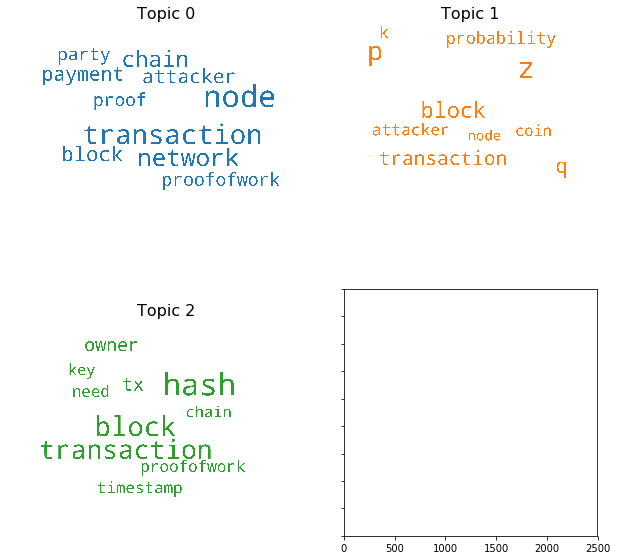

In [66]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

IndexError: list index out of range

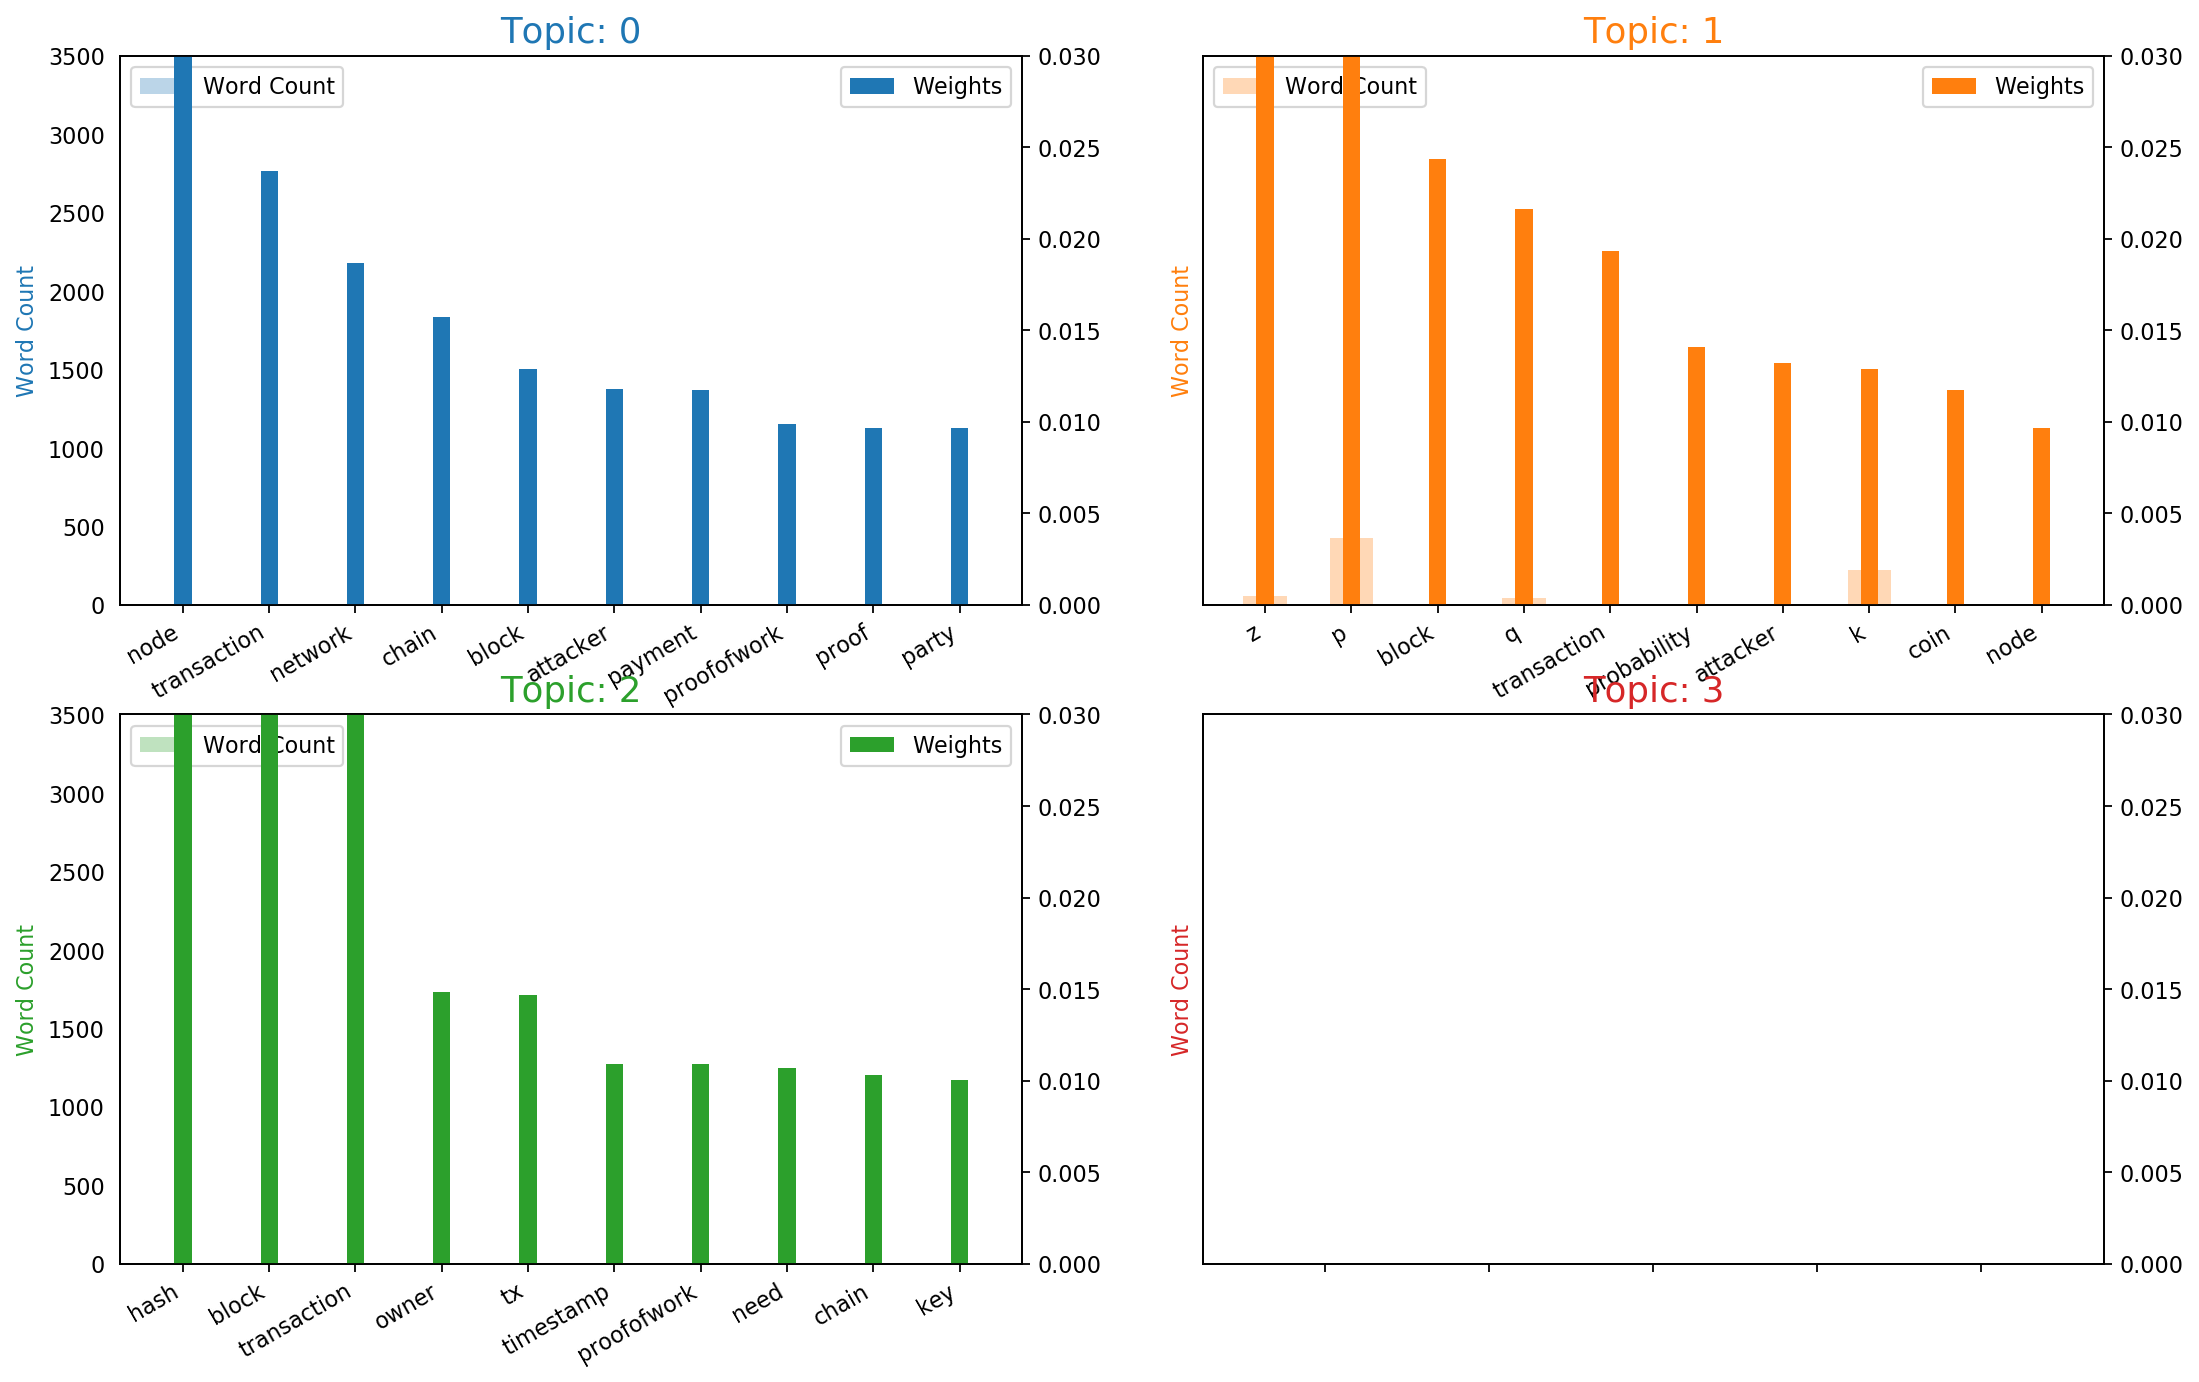

In [63]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in bitcorpus for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## Method Application

References:

https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

TopicModels_LDA Notebook from Prof. Markus Loecher